## Feature Selection Methods 

### SKLearn  SelectKBest (using statistical tests on features)

In [72]:
%matplotlib inline

import seaborn as sns


In [112]:
# load data
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("D:\GLI\ML-Data\pima-indians-diabetes.data", names= colnames)



C:\Users\Mukesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


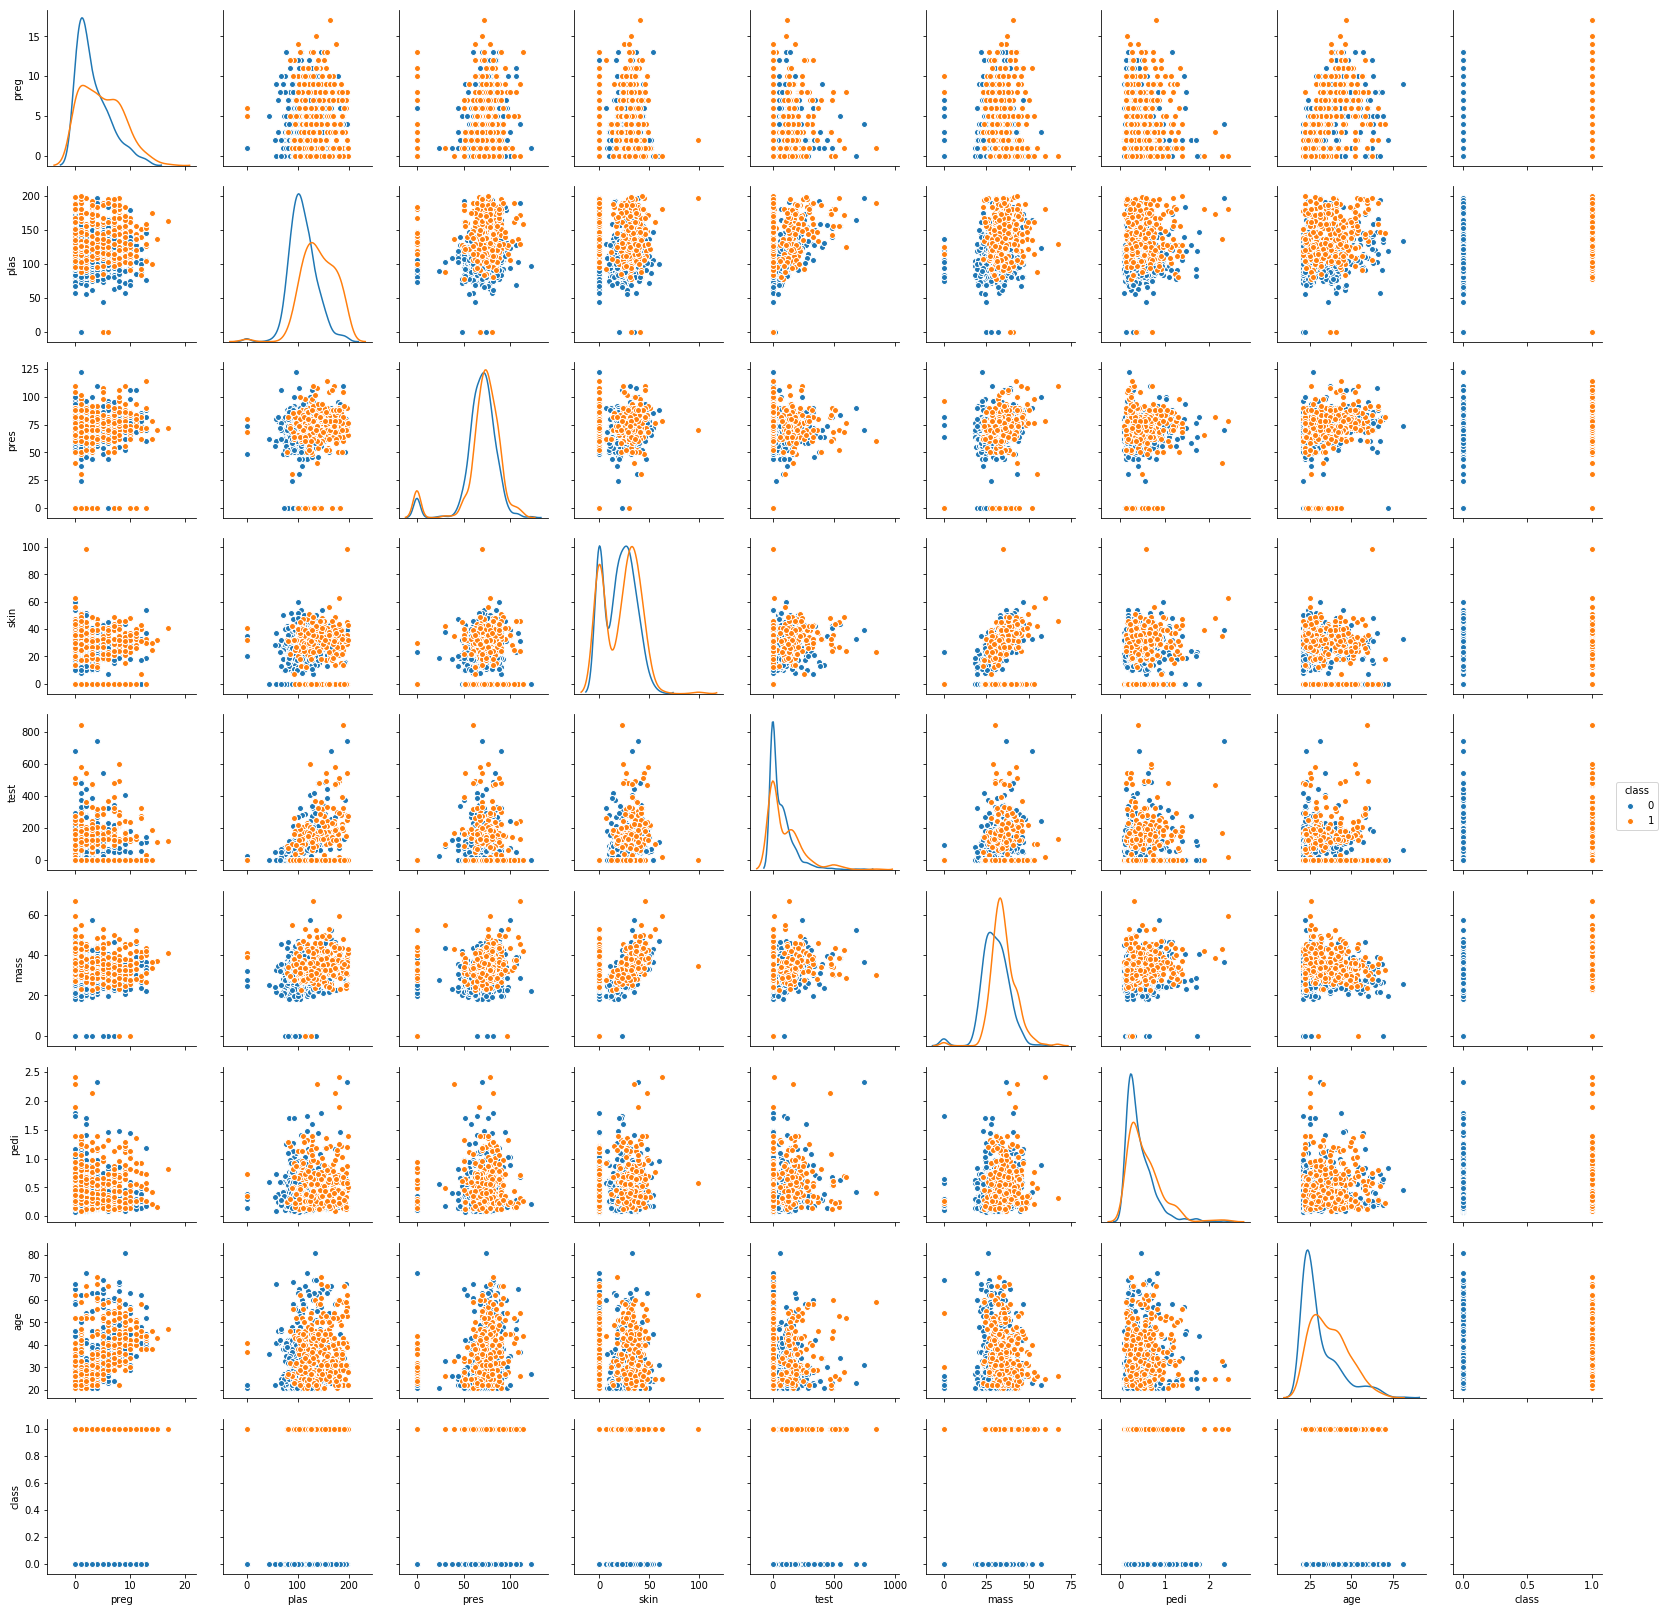

In [74]:
sns.pairplot(data=pima_df, diag_kind = 'kde', hue = 'class')

# Missing value / Outlier Treatement

Steps -
1. are there missing values? If yes, are these missing at randompor missing deliberately (difficult to check but assume random)
2. Replace the missing values with numpy Nan. This way these values will be avoided for any calculation of central values
3. Use a strategy to replace missing values with appropriate values
4. check the impact of the strategy on the distribution


In [99]:
# Are there missing values. Values may be missing but instead of blank you may find a numeric default such as 0

print((pima_df[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']] == 0).sum())

plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64


In [102]:
pima_df[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']] = pima_df[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']].replace(0, np.NaN)
print((pima_df[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']] == 0).sum())



plas    0
pres    0
skin    0
test    0
mass    0
pedi    0
age     0
dtype: int64


In [104]:
# Impute missing values using imputer class 

#from sklearn.preprocessing import Imputer    # deprecated. Use SimpleImputer
#imputer = Imputer()   # by default imputer replaces missing values with the mean. This can be modified to median or most frequent



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  
# careful! you may want to impute values of two classes separately as a common imputation may have negative impact


imputed_pima_values = imputer.fit_transform(pima_df)   # creates array on transformation

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [113]:
imputed_pima_df = pd.DataFrame(imputed_pima_values)
imputed_pima_df.columns = colnames
imputed_pima_df.head(50)
print((imputed_pima_df[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']] == np.NaN ).sum())

plas    0
pres    0
skin    0
test    0
mass    0
pedi    0
age     0
dtype: int64


C:\Users\Mukesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


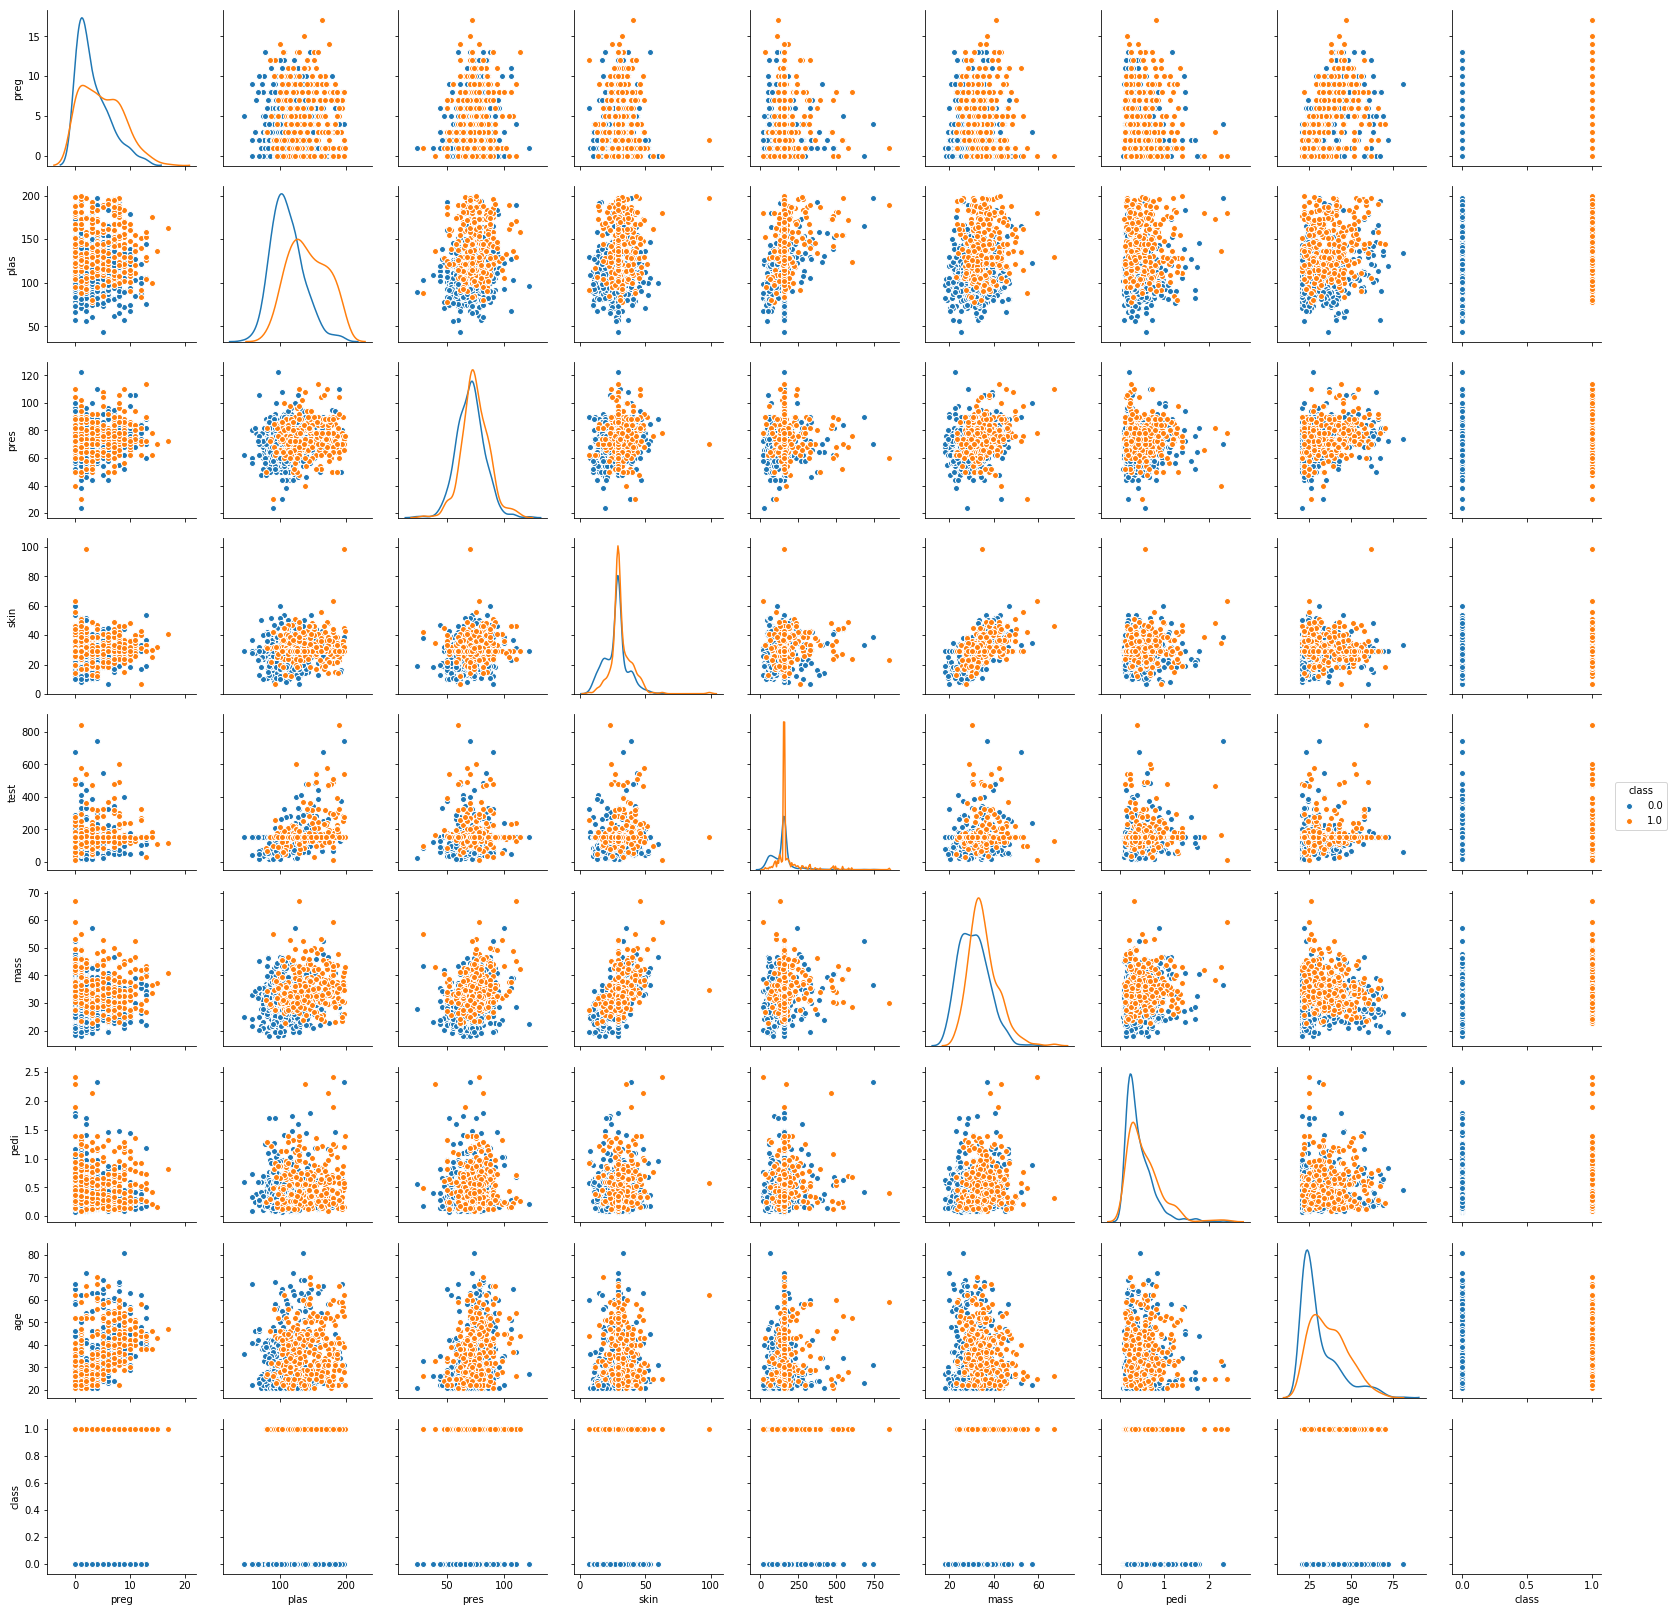

In [111]:
sns.pairplot(data=imputed_pima_df, diag_kind = 'kde', hue = 'class')  # Check the distribution after the imputation

### Outlier Analysis and treatement

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B872F8710>,
      dtype=object)

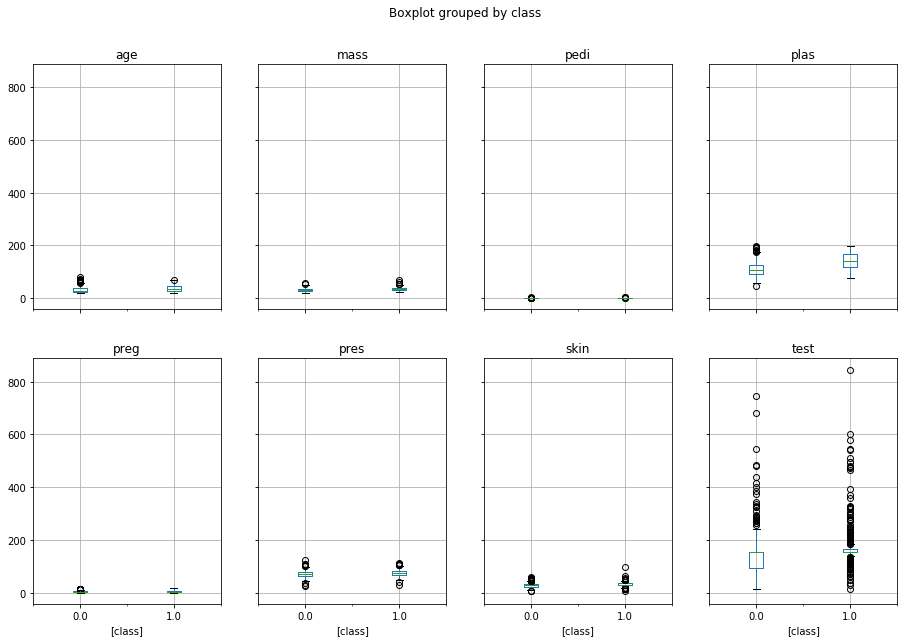

In [119]:
imputed_pima_df.boxplot(by = 'class', layout=(2,4), figsize=(15, 10))

In [131]:
# Addressing outliers at group level

 
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

final_pima_df = (imputed_pima_df.groupby('class').transform(replace)) 

final_pima_df['class'] = pima_df['class']

#print(final_pima_df.head(20))
#print(pima_df.head(20))

    preg   plas       pres      skin        test       mass   pedi   age  \
0    6.0  148.0  72.000000  35.00000  155.548223  33.600000  0.627  50.0   
1    1.0   85.0  66.000000  29.00000  155.548223  26.600000  0.351  31.0   
2    8.0  183.0  64.000000  29.15342  155.548223  23.300000  0.672  32.0   
3    1.0   89.0  66.000000  23.00000   94.000000  28.100000  0.167  21.0   
4    0.0  137.0  74.000000  35.00000  168.000000  43.100000  0.449  33.0   
5    5.0  116.0  74.000000  29.15342  155.548223  25.600000  0.201  30.0   
6    3.0  140.0  74.000000  32.00000   88.000000  31.000000  0.248  26.0   
7    2.0  115.0  72.405184  29.15342  155.548223  35.300000  0.134  29.0   
8    2.0  197.0  70.000000  45.00000  155.548223  30.500000  0.158  53.0   
9    8.0  125.0  96.000000  29.15342  155.548223  32.457464  0.232  54.0   
10   4.0  110.0  92.000000  29.15342  155.548223  37.600000  0.191  30.0   
11  10.0  168.0  74.000000  29.15342  155.548223  38.000000  0.537  34.0   
12   2.0  13

C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B8A13FC50>,
      dtype=object)

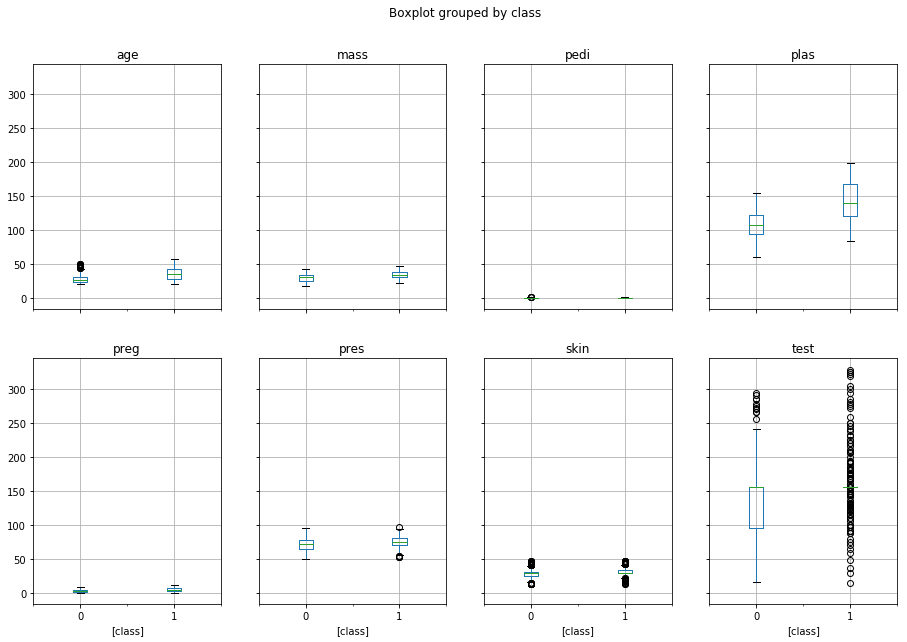

In [132]:
final_pima_df.boxplot(by = 'class', layout=(2,4), figsize=(15, 10))

In [148]:
from scipy.stats import zscore

# Scale the data 
cols = list(final_pima_df.columns)
cols.remove('class')
final_pima_df_z = final_pima_df.apply(zscore(cols))


TypeError: cannot perform reduce with flexible type

In [106]:


X = imputed_pima_df.values[:,0:8]
Y = imputed_pima_df.values[:,8]


#X = pima_df.values[:,0:8]
#Y = pima_df.values[:,8]



In [107]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2




# feature extraction
test = SelectKBest(score_func=chi2, k=3)    #using Chi-Square analysis for identifying features with correlation with target
fit = test.fit(X, Y)     # This line will assess strength of the relation between the features and the target


# summarize scores
np.set_printoptions(precision=3)   # contolling the decimal values in the print
print(fit.scores_)


features = fit.transform(X)     # Extract the identified features from the raw dataset (feature selection happens here)


# List the selected features
print(features[0:5,:])    # Sample records with only the selected features



[ 111.52  1418.705   42.75    94.246 1638.618  108.679    5.393  181.304]
[[148.    155.548  50.   ]
 [ 85.    155.548  31.   ]
 [183.    155.548  32.   ]
 [ 89.     94.     21.   ]
 [137.    168.     33.   ]]


In [108]:
print(X[0:5,:])   # Compare the data sampled with the raw set of features for confirmation

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 1.555e+02 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 1.555e+02 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 2.915e+01 1.555e+02 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [ ]:
# SelectKBest based on Chi-Square chose "Plas", "Test" and "Age"  as top features

### Recursive Feature Elimination using SKlearn RFE

In [109]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data  (Already loaded above)
#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#pima_df = pd.read_csv("D:\GLI\ML-Data\pima-indians-diabetes.data", names= colnames)
#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]



# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)   # use recursive feature elimination to find the 3 top features that give the best logistic regression 
fit = rfe.fit(X, Y)
print(("Num Features: %d"), fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_)   #Most useful features are given rank 1

Num Features: %d 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [ ]:
# RFE chose "Preg", "Mass" and "Pedi"  as top features    (The difference in selected features is due to 
# nature of the logistic regression model)

### Ensemble to select features...

In [110]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier as ET  #extremely randomized tree classifier.


# feature extraction
model = ET()
model.fit(X, Y)
print(model.feature_importances_)

[0.106 0.238 0.1   0.095 0.083 0.135 0.111 0.132]


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Ensemble chose "plas" , "mass" , "age" 